In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

# Preprocessing

In [113]:
# read the data
raw_data = pd.read_csv("/content/Absenteeism-data.csv")
raw_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [114]:
raw_data.drop(columns = ['Date', 'ID'], inplace = True)

In [115]:
raw_data.describe()

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [116]:
correlation_matrix = raw_data.select_dtypes(include = [int, float]).corr()
correlation_matrix

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
Reason for Absence,1.000000,-0.131790,0.160059,-0.055210,-0.130406,0.052741,-0.060083,-0.050053,-0.032872,-0.175826
Transportation Expense,-0.131790,1.000000,0.234940,-0.223828,0.006123,-0.140531,-0.054597,0.381749,0.446887,0.008342
Distance to Work,0.160059,0.234940,1.000000,-0.131076,-0.073683,0.136190,-0.282600,0.048534,0.171585,-0.080593
Age,-0.055210,-0.223828,-0.131076,1.000000,-0.045452,0.483762,-0.209330,0.046930,-0.252067,0.035784
Daily Work Load Average,-0.130406,0.006123,-0.073683,-0.045452,1.000000,-0.098430,-0.077012,0.032194,0.010490,0.029609
Body Mass Index,0.052741,-0.140531,0.136190,0.483762,-0.098430,1.000000,-0.348758,-0.155711,-0.066484,-0.040203
Education,-0.060083,-0.054597,-0.282600,-0.209330,-0.077012,-0.348758,1.000000,-0.179521,-0.080899,-0.035621
Children,-0.050053,0.381749,0.048534,0.046930,0.032194,-0.155711,-0.179521,1.000000,0.116586,0.093661
Pets,-0.032872,0.446887,0.171585,-0.252067,0.010490,-0.066484,-0.080899,0.116586,1.000000,-0.024522
Absenteeism Time in Hours,-0.175826,0.008342,-0.080593,0.035784,0.029609,-0.040203,-0.035621,0.093661,-0.024522,1.000000


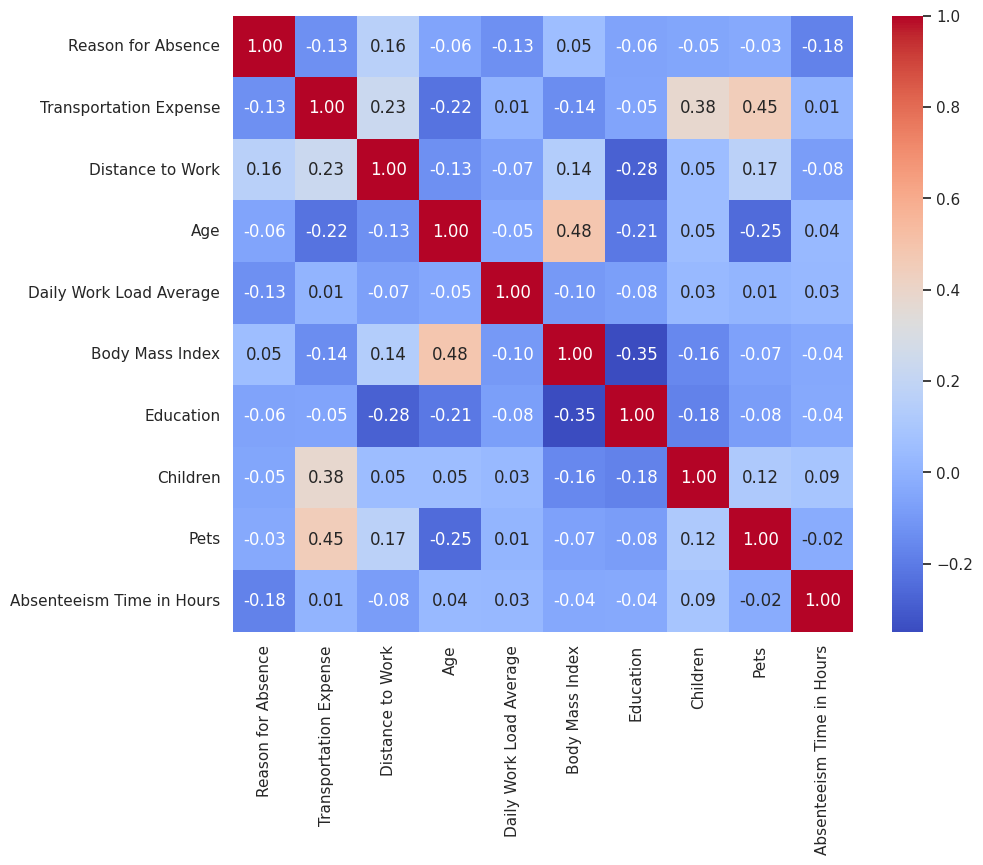

In [117]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.show()

In [118]:
# Get dummies for the 'Reason for Absence' column
reason_columns = pd.get_dummies(raw_data['Reason for Absence'], drop_first = True, dtype = int)
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [119]:
# seprate the reasosn into 4 groups based on the simillar reasons
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

In [120]:
# Remove the 'Reason for Absence' column from the dataset and add the reason types columns to the main dataset
raw_data.drop(columns = ['Reason for Absence'], inplace = True)
df = pd.concat([raw_data, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [121]:
# Rearrance the columns for better view

column_names = [ 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

df.columns = column_names
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

df = df[column_names_reordered]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2


In [122]:
# Seprate the target variable from the dataset based on weather the Absenteeism time in hours is greater than 4

targets = np.where(df['Absenteeism Time in Hours'] >
                   df['Absenteeism Time in Hours'].median(), 1, 0)
df['Excessive Absenteeism'] = targets

In [123]:
df.drop(columns = ['Absenteeism Time in Hours'], inplace = True)
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,289,36,33,239.554,30,1,2,1,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,179,51,38,239.554,31,1,0,0,0
3,1,0,0,0,279,5,39,239.554,24,1,2,0,1
4,0,0,0,1,289,36,33,239.554,30,1,2,1,0


In [124]:
df_reason_mod = df.drop(columns = ['Excessive Absenteeism'], axis = 1)
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,289,36,33,239.554,30,1,2,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0
2,0,0,0,1,179,51,38,239.554,31,1,0,0
3,1,0,0,0,279,5,39,239.554,24,1,2,0
4,0,0,0,1,289,36,33,239.554,30,1,2,1


# Build the model

In [126]:
from sklearn.preprocessing import StandardScaler

# Scale the data
absenteeism_scaler = StandardScaler()
absenteeism_scaler.fit(df_reason_mod)
scaled_inputs = absenteeism_scaler.transform(df_reason_mod)
scaled_inputs.shape

(700, 12)

In [127]:
from sklearn.model_selection import train_test_split

# Split the data in train and test
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size = 0.2, random_state = 20)

In [128]:
# import the LogReg model from sklearn
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

# fit the data and find the score of the model using the test dataset
reg = LogisticRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.7892857142857143

In [129]:
# Predict the test output
model_outputs = reg.predict(x_test)
model_outputs

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0])

In [131]:
# Get the features from the dataset
feature_name = df_reason_mod.columns.values
feature_name

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [132]:
# Create a summary table with the feature name and their corrosponding coefficient values for better understanding
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

# add the coefficient values to the summary table
summary_table['Coefficient'] = np.transpose(reg.coef_)

# display the summary table
summary_table

,Feature name,Coefficient
0,Reason_1,2.062291
1,Reason_2,0.323842
2,Reason_3,1.555882
3,Reason_4,1.306055
4,Transportation Expense,0.724411
5,Distance to Work,-0.063415
6,Age,-0.213973
7,Daily Work Load Average,-0.038497
8,Body Mass Index,0.337910
9,Education,-0.159105


In [133]:
# Create a Odd table
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
0,Reason_1,2.062291,7.863965
2,Reason_3,1.555882,4.739266
3,Reason_4,1.306055,3.691581
4,Transportation Expense,0.724411,2.063516
10,Children,0.377706,1.458933
8,Body Mass Index,0.337910,1.402014
1,Reason_2,0.323842,1.382429
7,Daily Work Load Average,-0.038497,0.962235
5,Distance to Work,-0.063415,0.938553
9,Education,-0.159105,0.852907
